In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import decimal
from decimal import Decimal as Dc

In [2]:
class iSITH():
    def __init__(self, tau_min=.005, tau_max=3, buff_max=None, k=50, ntau=20, dt=1, g=0.0):
        super(iSITH, self).__init__()
        self.c = (tau_max/tau_min)**(1./(ntau-1))-1
        self.tau_star = tau_min*(1+self.c)**np.arange(ntau).astype(float)
        self.s = 1/self.tau_star

Sith = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=1000)
S = Sith.s[::-1]
c = Sith.c
Sith1 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=500)
S1 = Sith1.s[::-1]
c1 = Sith1.c
Sith2 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=250)
S2 = Sith2.s[::-1]
c2 = Sith2.c
Sith3 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=100)
S3 = Sith3.s[::-1]
c3 = Sith3.c
Sith4 = iSITH(tau_min=0.04818896416694335,tau_max=1000,ntau=25)
S4 = Sith4.s[::-1]
c4 = Sith4.c

In [3]:
delt_frac = 0.1
dt = delt_frac / S[-1]
ns = 100
t_max = ns * dt
T = np.arange(0,t_max,dt)

In [4]:
def updateF(F,S,c,dt):
    log1c = np.log(1+c)
    dFdn = np.diff(F)
    d2F_dtdn = -S[1:]*dt*(np.log(1+c)*F[1:] + dFdn)

    newF = np.zeros(len(F))
    #newF[0] = F[0]
    newF[0] = F[0]*np.exp(-S[0]*dt)
    
    for i in range(1,len(F)):
        dF_prior_dt = newF[i-1] - F[i-1]
        dF_dt = dF_prior_dt + d2F_dtdn[i-1]
        newF[i] = F[i] + dF_dt
    return newF

def updateP(P,S,c,dt):
    log1c = np.log(1+c)
    dPdn = np.diff(P)
    d2P_dtdn = S[1:]*dt*(log1c*P[1:] + dPdn)

    newP = np.zeros(len(P))
    newP[0] = P[0]*np.exp(S[0]*dt)
    
    for i in range(1,len(P)):
        dP_prior_dt = newP[i-1] - P[i-1]
        dP_dt = dP_prior_dt + d2P_dtdn[i-1]
        newP[i] = P[i] + dP_dt
    return newP

In [5]:
F = np.full([len(S)],1)
F1 = np.full([len(S1)],1)
F2 = np.full([len(S2)],1)
F3 = np.full([len(S3)],1)
F4 = np.full([len(S4)],1)

for t in T:
    F = updateF(F=F,S=S,c=c,dt=dt)
    F1 = updateF(F=F1, S=S1,c=c1, dt=dt)
    F2 = updateF(F=F2, S=S2,c=c2, dt=dt)
    F3 = updateF(F=F3, S=S3,c=c3, dt=dt)
    F4 = updateF(F=F4, S=S4,c=c4, dt=dt)


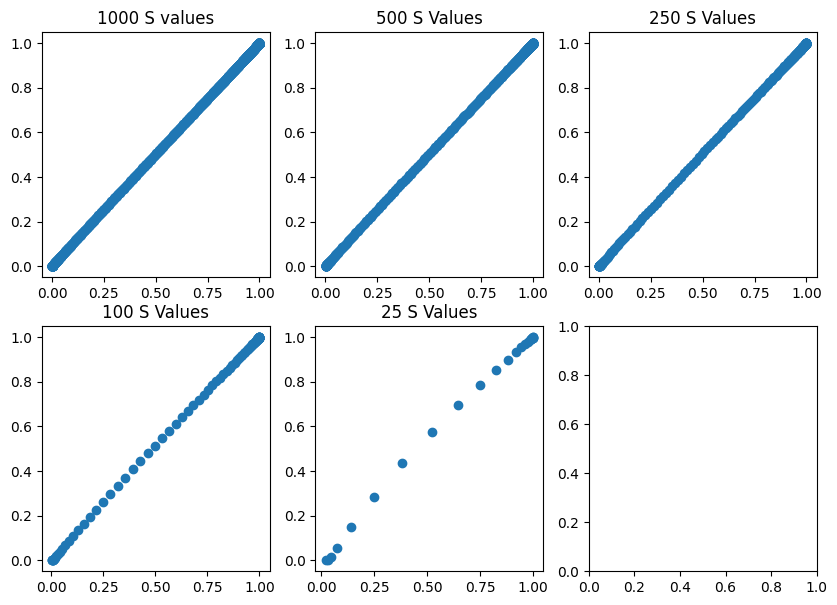

In [6]:
fig, ax = plt.subplots(2,3,figsize = (10,7))
ax[0,0].scatter(F,np.exp(-t_max*S))
ax[0,0].set_title("1000 S values")
ax[0,1].scatter(F1, np.exp(-t_max*S1))
ax[0,1].set_title("500 S Values")
ax[0,2].scatter(F2, np.exp(-t_max*S2))
ax[0,2].set_title("250 S Values")
ax[1,0].scatter(F3, np.exp(-t_max*S3))
ax[1,0].set_title("100 S Values")
ax[1,1].scatter(F4, np.exp(-t_max*S4))
ax[1,1].set_title("25 S Values");

In [25]:
P=F
P1 = F1
P2 = F2
P3 = F3
P4 = F4
for t in T:
    P = updateP(P=P,S=S,c=c,dt=dt)
    P1 = updateP(P=P1, S=S1,c=c1, dt=dt)
    P2 = updateP(P=P2, S=S2,c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3,c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4,c=c4, dt=dt)

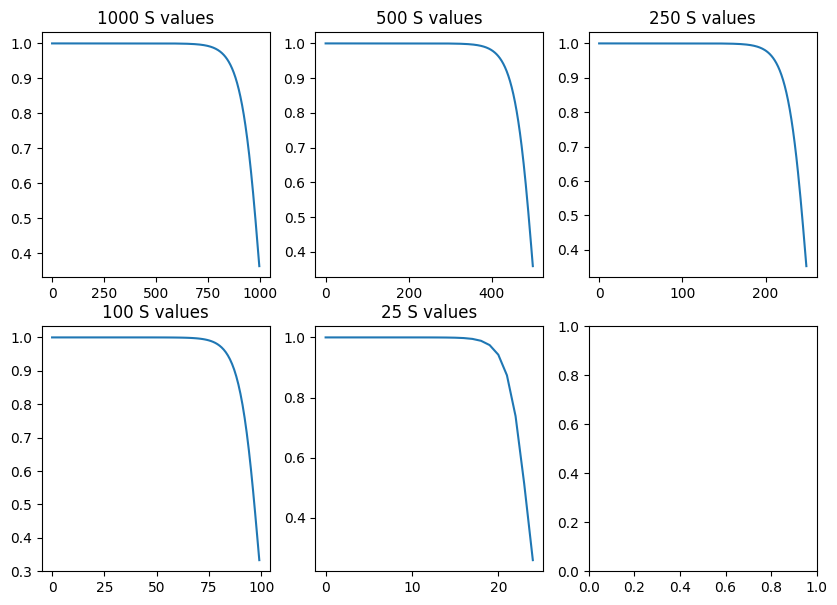

In [8]:
fig,ax = plt.subplots(2,3, figsize = (10,7))
ax[0,0].plot(P)
ax[0,0].set_title("1000 S values")
ax[0,1].plot(P1)
ax[0,1].set_title("500 S values")
ax[0,2].plot(P2)
ax[0,2].set_title("250 S values")
ax[1,0].plot(P3)
ax[1,0].set_title("100 S values")
ax[1,1].plot(P4)
ax[1,1].set_title("25 S values");

Text(0.5, 1.0, '25 S, dt=0.000963779283338867')

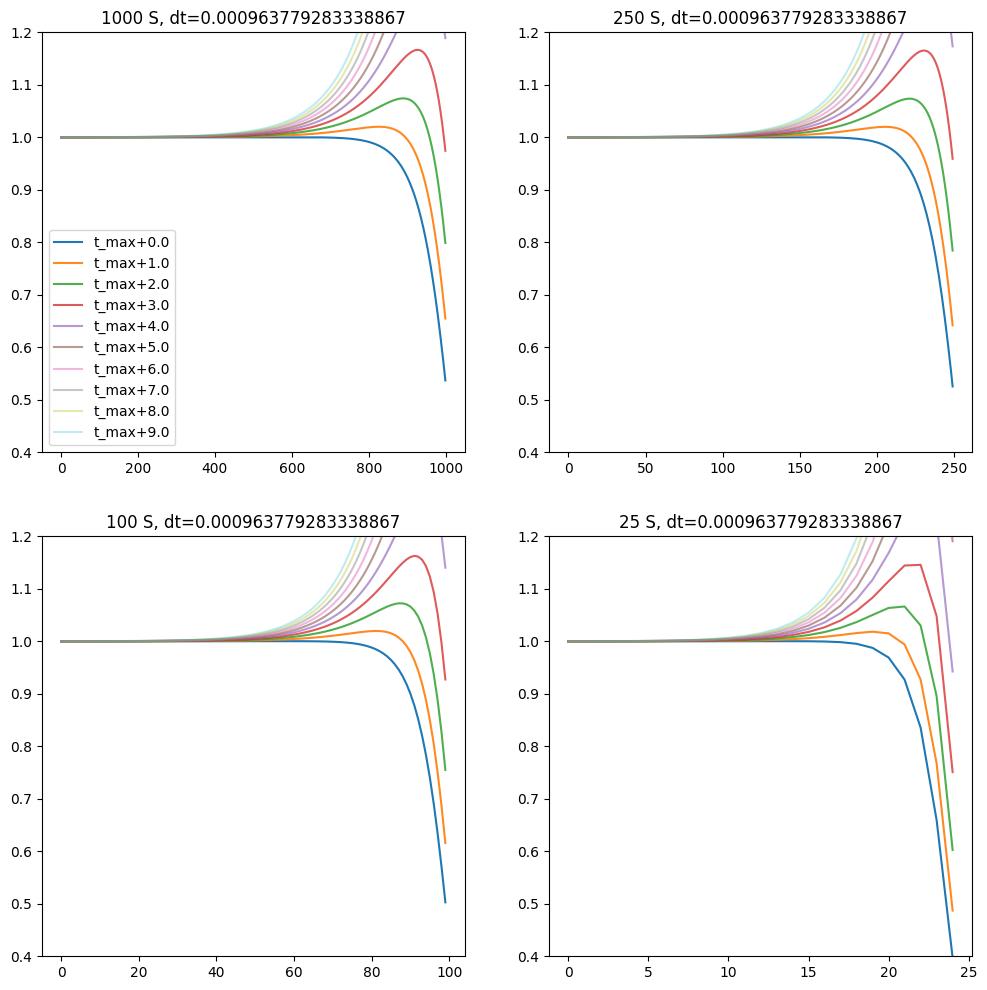

In [13]:
#test P update past t_max at dt = dt/5
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].set_ylim(0.4,1.2)
ax[0,1].set_ylim(0.4,1.2)
ax[1,0].set_ylim(0.4,1.2)
ax[1,1].set_ylim(0.4,1.2)
P=F
P1 = F1
P2 = F2
P3 = F3
P4 = F4
dt = delt_frac / S[-1] / 5
T = np.arange(0,t_max,dt)
for t in T:
    P = updateP(P=P,S=S,c=c,dt=dt)
    P1 = updateP(P=P1, S=S1,c=c1, dt=dt)
    P2 = updateP(P=P2, S=S2,c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3,c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4,c=c4, dt=dt)
for t in range(10*2*5):
    P = updateP(P=P, S=S, c=c, dt=dt)
    P2 = updateP(P=P2, S=S2, c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3, c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4, c=c4, dt=dt)
    if t%10 == 0:
        alpha = 0.2+0.08*(10-t//10)
        ax[0,0].plot(P , alpha=alpha,label = ("t_max+%s" %(t/10)))
        ax[0,1].plot(P2 ,alpha=alpha,label = ("t_max+%s" %(t/10)))
        ax[1,0].plot(P3 ,alpha=alpha,label = ("t_max+%s" %(t/10)))
        ax[1,1].plot(P4 ,alpha=alpha,label = ("t_max+%s" %(t/10)))

ax[0,0].legend()
ax[0,0].set_title("1000 S, dt=%s" %(dt))
ax[0,1].set_title("250 S, dt=%s" %(dt))
ax[1,0].set_title("100 S, dt=%s" %(dt))
ax[1,1].set_title("25 S, dt=%s" %(dt))

Text(0.5, 1.0, '25 S, dt=0.004818896416694335')

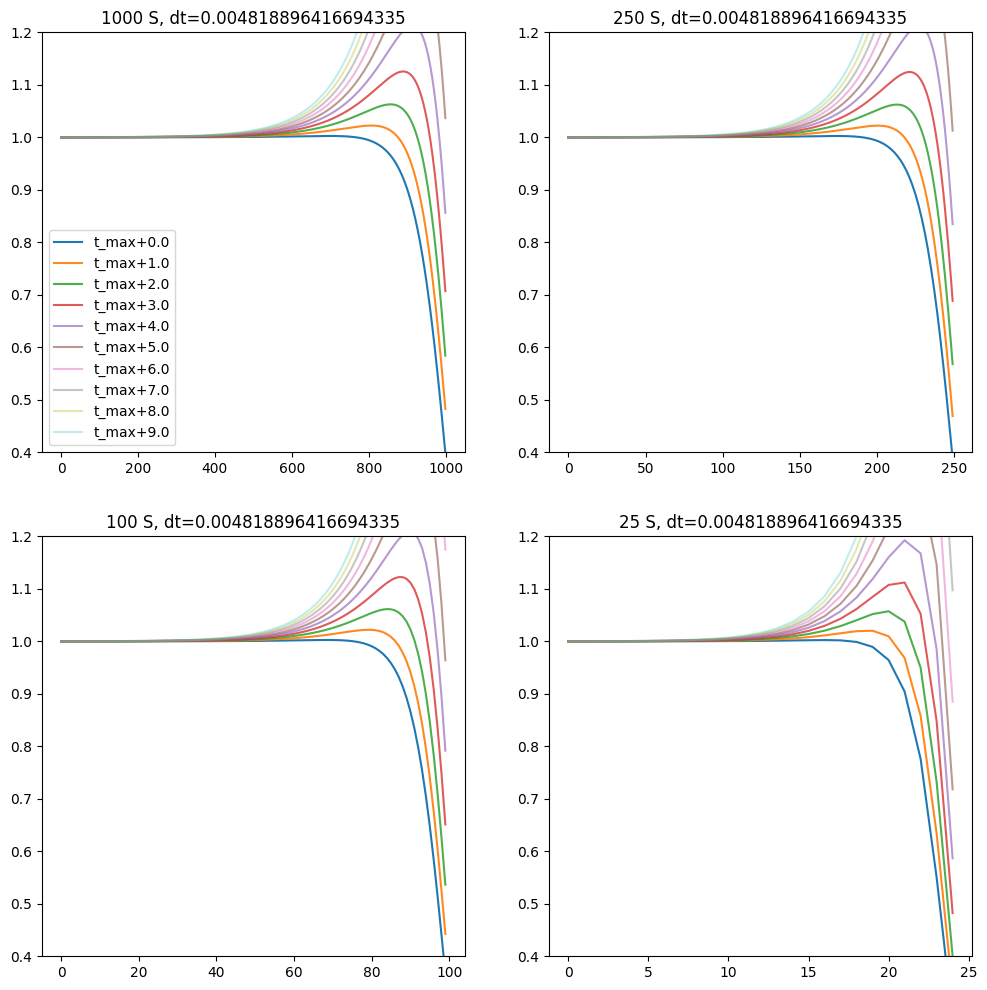

In [15]:
#test P update past t_max at dt = dt
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].set_ylim(0.4,1.2)
ax[0,1].set_ylim(0.4,1.2)
ax[1,0].set_ylim(0.4,1.2)
ax[1,1].set_ylim(0.4,1.2)
P=F
P2 = F2
P3 = F3
P4 = F4
dt = delt_frac / S[-1]
T = np.arange(0,t_max,dt)
for t in T:
    P = updateP(P=P,S=S,c=c,dt=dt)
    P2 = updateP(P=P2, S=S2,c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3,c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4,c=c4, dt=dt)
for t in range(2*10):
    P = updateP(P=P, S=S, c=c, dt=dt)
    P2 = updateP(P=P2, S=S2, c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3, c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4, c=c4, dt=dt)
    if t%2 == 0:
        alpha = 0.2+0.08*(10-t//2)
        ax[0,0].plot(P , alpha=alpha,label = ("t_max+%s" %(t/2)))
        ax[0,1].plot(P2 ,alpha=alpha,label = ("t_max+%s" %(t/2)))
        ax[1,0].plot(P3 ,alpha=alpha,label = ("t_max+%s" %(t/2)))
        ax[1,1].plot(P4 ,alpha=alpha,label = ("t_max+%s" %(t/2)))

ax[0,0].legend()
ax[0,0].set_title("1000 S, dt=%s" %(dt))
ax[0,1].set_title("250 S, dt=%s" %(dt))
ax[1,0].set_title("100 S, dt=%s" %(dt))
ax[1,1].set_title("25 S, dt=%s" %(dt))

Text(0.5, 1.0, '25 S, dt=0.00963779283338867')

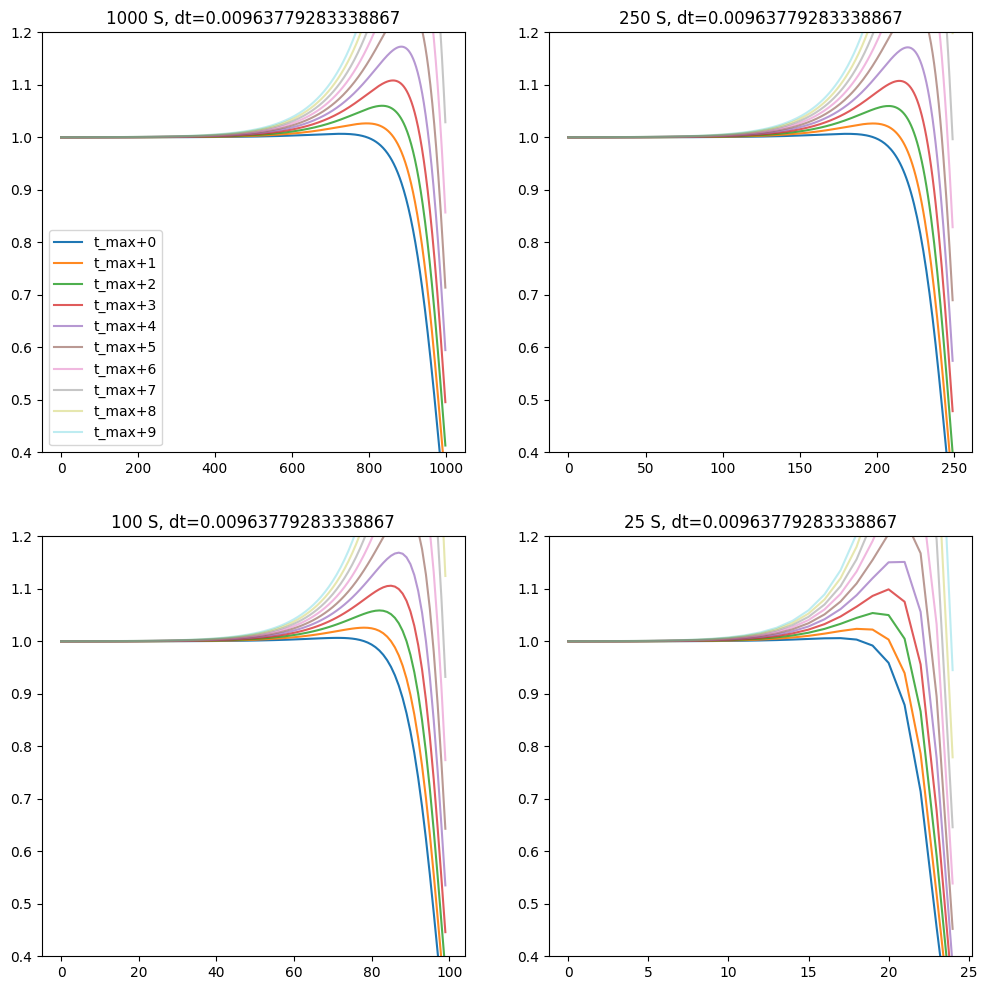

In [17]:
#test P update past t_max at dt = dt*2
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].set_ylim(0.4,1.2)
ax[0,1].set_ylim(0.4,1.2)
ax[1,0].set_ylim(0.4,1.2)
ax[1,1].set_ylim(0.4,1.2)
P=F
P1 = F1
P2 = F2
P3 = F3
P4 = F4
dt = delt_frac*2 / S[-1]
T = np.arange(0,t_max,dt)
for t in T:
    P = updateP(P=P,S=S,c=c,dt=dt)
    P1 = updateP(P=P1, S=S1,c=c1, dt=dt)
    P2 = updateP(P=P2, S=S2,c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3,c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4,c=c4, dt=dt)
for t in range(10):
    P = updateP(P=P, S=S, c=c, dt=dt)
    P2 = updateP(P=P2, S=S2, c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3, c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4, c=c4, dt=dt)
    if t%1 == 0:
        alpha = 0.2+0.08*(10-t)
        ax[0,0].plot(P , alpha=alpha,label = ("t_max+%s" %(t)))
        ax[0,1].plot(P2 ,alpha=alpha,label = ("t_max+%s" %(t)))
        ax[1,0].plot(P3 ,alpha=alpha,label = ("t_max+%s" %(t)))
        ax[1,1].plot(P4 ,alpha=alpha,label = ("t_max+%s" %(t)))

ax[0,0].legend()
ax[0,0].set_title("1000 S, dt=%s" %(dt))
ax[0,1].set_title("250 S, dt=%s" %(dt))
ax[1,0].set_title("100 S, dt=%s" %(dt))
ax[1,1].set_title("25 S, dt=%s" %(dt))

Text(0.5, 1.0, '25 S, dt=0.004818896416694335')

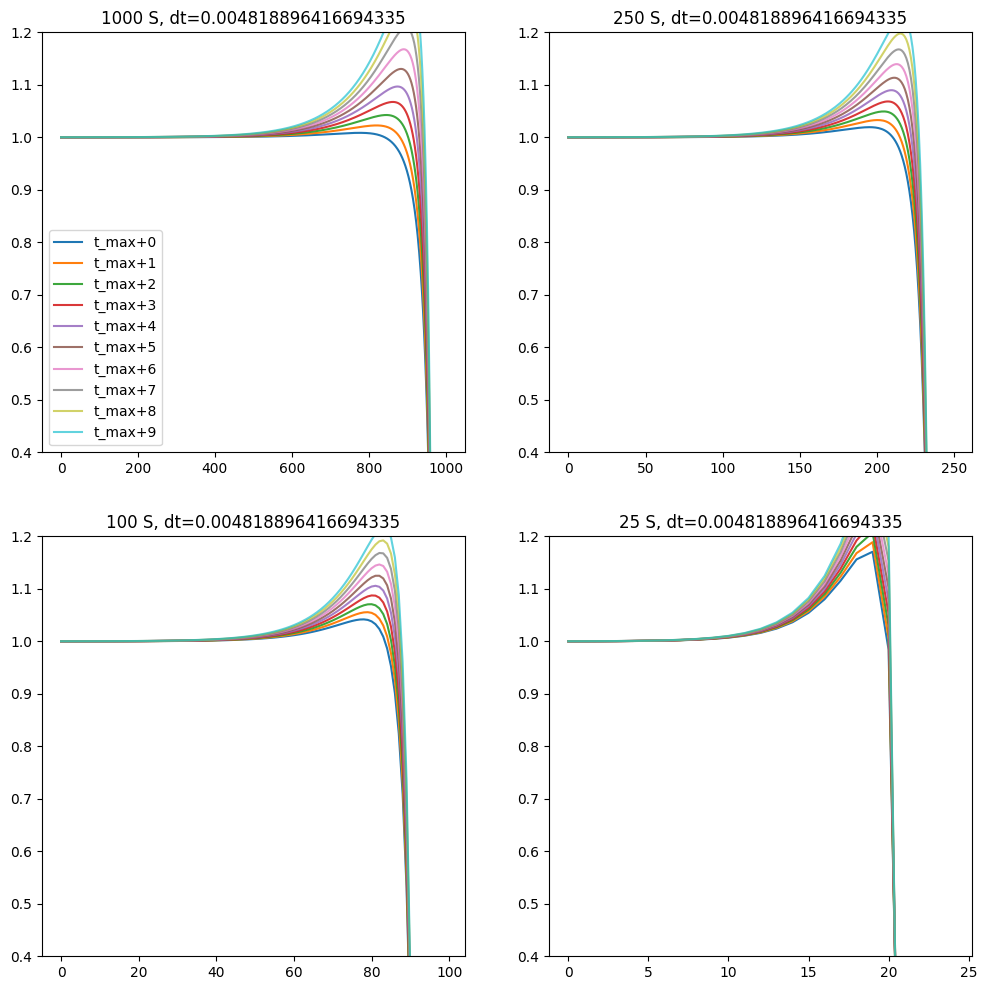

In [19]:
#test P update past t_max with analytical F
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].set_ylim(0.4,1.2)
ax[0,1].set_ylim(0.4,1.2)
ax[1,0].set_ylim(0.4,1.2)
ax[1,1].set_ylim(0.4,1.2)
P= np.exp(-S*t_max)
P2 = np.exp(-S2*t_max)
P3 = np.exp(-S3*t_max)
P4 = np.exp(-S4*t_max)
dt = delt_frac / S[-1]
T = np.arange(0,t_max,dt)
for t in T:
    P = updateP(P=P,S=S,c=c,dt=dt)
    P2 = updateP(P=P2, S=S2,c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3,c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4,c=c4, dt=dt)
for t in range(10):
    P = updateP(P=P, S=S, c=c, dt=dt)
    P2 = updateP(P=P2, S=S2, c=c2, dt=dt)
    P3 = updateP(P=P3, S=S3, c=c3, dt=dt)
    P4 = updateP(P=P4, S=S4, c=c4, dt=dt)
    if t%1 == 0:
        alpha = 0.2+0.08*(10-t//2)
        ax[0,0].plot(P , alpha=alpha,label = ("t_max+%s" %(t)))
        ax[0,1].plot(P2 ,alpha=alpha,label = ("t_max+%s" %(t)))
        ax[1,0].plot(P3 ,alpha=alpha,label = ("t_max+%s" %(t)))
        ax[1,1].plot(P4 ,alpha=alpha,label = ("t_max+%s" %(t)))

ax[0,0].legend()
ax[0,0].set_title("1000 S, dt=%s" %(dt))
ax[0,1].set_title("250 S, dt=%s" %(dt))
ax[1,0].set_title("100 S, dt=%s" %(dt))
ax[1,1].set_title("25 S, dt=%s" %(dt))

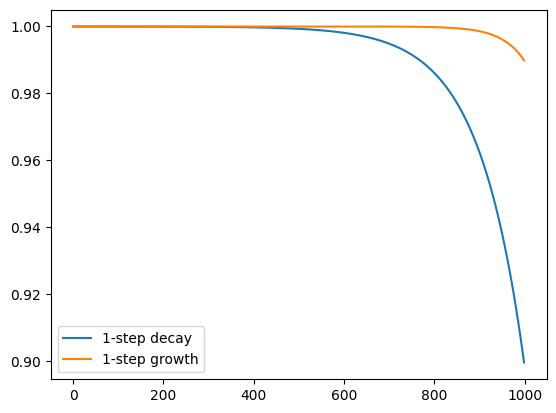

In [24]:
F_test = np.full([len(S)],1)
F_test = updateF(F=F_test,S=S,c=c,dt=dt)
plt.plot(F_test, label="1-step decay")
P_test = updateP(P=F_test,S=S,c=c,dt=dt)
plt.plot(P_test, label="1-step growth")
plt.legend()

Text(0.5, 1.0, 'Difference')

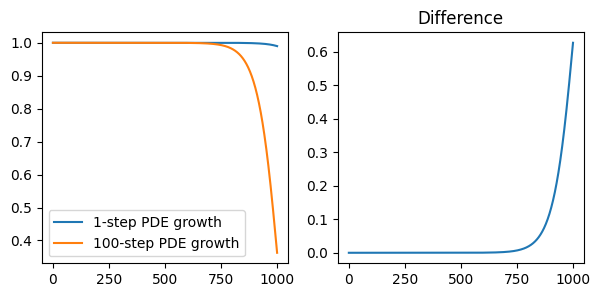

In [33]:
fig, ax = plt.subplots(1,2, figsize=(7,3))
ax[0].plot(P_test, label="1-step PDE growth")
ax[0].plot(P, label="100-step PDE growth")
ax[1].plot(P_test-P)
ax[0].legend()
ax[1].set_title("Difference")

In [31]:
len(P)

1000

In [21]:
#def updateF(F,S,c,dt):
#    dlogs = 1
#    log1pc = np.log(1+c)
#    
#    partial = np.zeros(len(F))
#    rhs = np.zeros(len(F))
#    
#    partial[1:] = np.diff(F)
#    rhs[1:] = S[1:] * (F[1:] * log1pc * dlogs + partial[1:])
#    rhs = rhs*(-dt)
#    newF = np.zeros(len(F))
#    newF[0] = 1
#    for i in range(1, len(F)):
#        newF[i] = rhs[i] + newF[i-1] + (F[i] - F[i-1])
#    return newF